# Census Income Project

In [452]:
# Importing Laibraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [451]:
# Loading Dataset
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/census_income.csv')
df.head(15)

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
5,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
6,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
7,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
8,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K
9,37,Private,280464,Some-college,10,Married-civ-spouse,Exec-managerial,Husband,Black,Male,0,0,80,United-States,>50K


6 columns have numerical data and remaining columns have categorical data. We have to process this data

# Problem Statement:


This data was extracted from the 1994 Census bureau database by Ronny Kohavi and Barry Becker (Data Mining and Visualization, Silicon Graphics). A set of reasonably clean records was extracted using the following conditions: ((AAGE>16) && (AGI>100) && (AFNLWGT>1) && (HRSWK>0)). The prediction task is to determine whether a person makes over $50K a year.

Description of fnlwgt (final weight)
The weights on the Current Population Survey (CPS) files are controlled to independent estimates of the civilian non-institutional population of the US. These are prepared monthly for us by Population Division here at the Census Bureau. We use 3 sets of controls. These are:

A single cell estimate of the population 16+ for each state.

Controls for Hispanic Origin by age and sex.

Controls by Race, age and sex.

We use all three sets of controls in our weighting program and "rake" through them 6 times so that by the end we come back to all the controls we used. The term estimate refers to population totals derived from CPS by creating "weighted tallies" of any specified socio-economic characteristics of the population. People with similar demographic characteristics should have similar weights. There is one important caveat to remember about this statement. That is that since the CPS sample is actually a collection of 51 state samples, each with its own probability of selection, the statement only applies within state.

The prediction task is to determine whether a person makes over $50K a year.

# Exploratory Data Analysis (EDA)

In [375]:
df.shape

(32560, 15)

In [376]:
# Checking Null Values
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

In [377]:
#columns name
df.columns

Index(['Age', 'Workclass', 'Fnlwgt', 'Education', 'Education_num',
       'Marital_status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital_gain', 'Capital_loss', 'Hours_per_week', 'Native_country',
       'Income'],
      dtype='object')

In [378]:
# Checking Data types
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

9 columns have categorical values and 6 columns have numeric values

In [379]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32560 entries, 0 to 32559
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             32560 non-null  int64 
 1   Workclass       32560 non-null  object
 2   Fnlwgt          32560 non-null  int64 
 3   Education       32560 non-null  object
 4   Education_num   32560 non-null  int64 
 5   Marital_status  32560 non-null  object
 6   Occupation      32560 non-null  object
 7   Relationship    32560 non-null  object
 8   Race            32560 non-null  object
 9   Sex             32560 non-null  object
 10  Capital_gain    32560 non-null  int64 
 11  Capital_loss    32560 non-null  int64 
 12  Hours_per_week  32560 non-null  int64 
 13  Native_country  32560 non-null  object
 14  Income          32560 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


The data-set contains 32560 rows and 15 columns. Our target column(variable) is Income. In this dataset 6 columns are integers and 9 columns are objects. Here is the short description:
1. Age - age of person
2. Workclass - Type of job
3. Fnlwgt -  The weights on the Current Population Survey (CPS) files
4. Education - Education status
5. Education_num - Number of years of education in total
6. Marital_status - Marital Status
7. Occupation - person's Occupation
8. Relationship - Relationship
9. Race - residential segregation
10. Sex - Gender
11. Capital_gain - Capital gain is the profit one earns
12. Capital_loss - Capital gain is the profit one loose
13. Hours_per_week - Earning rate as per hrs
14. Native_country - Country
15. Income - Income (Target variable)

In [380]:
df.nunique()

Age                  73
Workclass             9
Fnlwgt            21647
Education            16
Education_num        16
Marital_status        7
Occupation           15
Relationship          6
Race                  5
Sex                   2
Capital_gain        119
Capital_loss         92
Hours_per_week       94
Native_country       42
Income                2
dtype: int64

In [409]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


<AxesSubplot:>

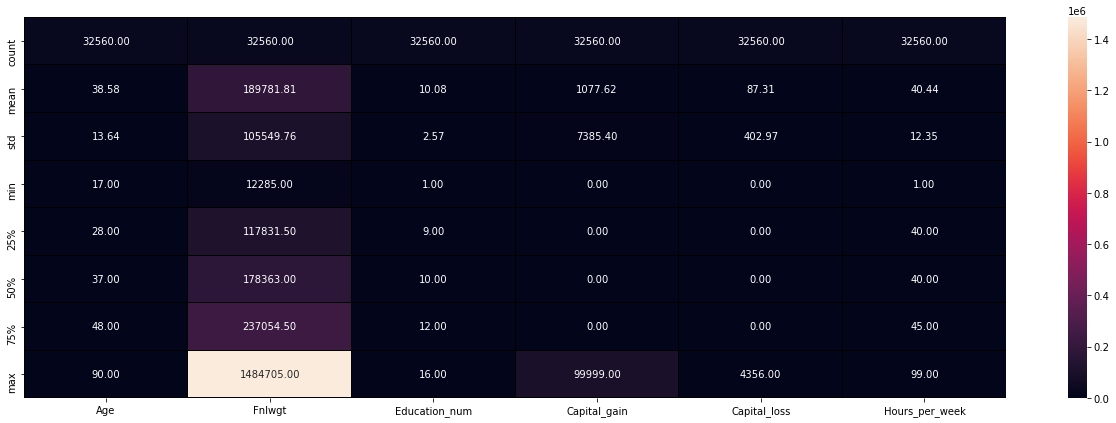

In [410]:
plt.figure(figsize=(22,7))
sns.heatmap(df.describe(), annot=True, linewidth=0.1 ,linecolor="black", fmt="0.2f")

In [453]:
# Checking all of the data types which have unique values
for column in df.columns:
    if df[column].dtype == object:
        print(str(column) + ':' + str(df[column].unique()))
        print(df[column].value_counts())
        print('_________________________________________________________')# for saperation

Workclass:[' Self-emp-not-inc' ' Private' ' State-gov' ' Federal-gov' ' Local-gov'
 ' ?' ' Self-emp-inc' ' Without-pay' ' Never-worked']
 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64
_________________________________________________________
Education:[' Bachelors' ' HS-grad' ' 11th' ' Masters' ' 9th' ' Some-college'
 ' Assoc-acdm' ' Assoc-voc' ' 7th-8th' ' Doctorate' ' Prof-school'
 ' 5th-6th' ' 10th' ' 1st-4th' ' Preschool' ' 12th']
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th     

In [454]:
# saperating string and numeric datatype column and storing in the list
cols = list(df.columns.values)
str_cols = []
num_cols = []
for i in range(0,15):
    if df.iloc[:,i].dtype == 'object':
        str_cols.append(cols[i])
    else:
        num_cols.append(cols[i])

In [455]:
#now checking which string data type column contains ('?') unique value 
for i in str_cols:
    print(df[i].str.contains('\?').value_counts(),'\n')
    print('----------------------------')

False    30724
True      1836
Name: Workclass, dtype: int64 

----------------------------
False    32560
Name: Education, dtype: int64 

----------------------------
False    32560
Name: Marital_status, dtype: int64 

----------------------------
False    30717
True      1843
Name: Occupation, dtype: int64 

----------------------------
False    32560
Name: Relationship, dtype: int64 

----------------------------
False    32560
Name: Race, dtype: int64 

----------------------------
False    32560
Name: Sex, dtype: int64 

----------------------------
False    31977
True       583
Name: Native_country, dtype: int64 

----------------------------
False    32560
Name: Income, dtype: int64 

----------------------------


Here I find Workclass, Occupation and Native_country column have unique values and need to deal with it

In [456]:
for i in ('Workclass', 'Occupation', 'Native_country'):
    print(df[i].value_counts()[df[i].value_counts() == df[i].value_counts().max()],'\n')
    print('********************')

 Private    22696
Name: Workclass, dtype: int64 

********************
 Prof-specialty    4140
Name: Occupation, dtype: int64 

********************
 United-States    29169
Name: Native_country, dtype: int64 

********************


In [457]:
df['Workclass'] = df['Workclass'].str.replace('\?', 'Private', regex = True)
df['Occupation'] = df['Occupation'].str.replace('\?', 'Prof-specialty', regex = True)
df['Native_country'] = df['Native_country'].str.replace('\?', 'United-States', regex = True)

In [458]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Here i replace the '?' with max occurance vaue i.e. Workclass-'Private', Occupation-'Prof-specialty', Native_country-'United-States' 

## Visualization of the Data

In [287]:
#details of Workclss column
print(df["Workclass"].value_counts(),'\n')
edu = df['Workclass'].unique()
for i in edu:
    print(i,':\n',df.loc[df['Workclass'] == i].value_counts(df['Income']),'\n')
    print('--------------')

 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64 

 Self-emp-not-inc :
 Income
 <=50K    1817
 >50K      724
dtype: int64 

--------------
 Private :
 Income
 <=50K    19378
 >50K      5154
dtype: int64 

--------------
 State-gov :
 Income
 <=50K    944
 >50K     353
dtype: int64 

--------------
 Federal-gov :
 Income
 <=50K    589
 >50K     371
dtype: int64 

--------------
 Local-gov :
 Income
 <=50K    1476
 >50K      617
dtype: int64 

--------------
 Self-emp-inc :
 Income
 >50K     622
 <=50K    494
dtype: int64 

--------------
 Without-pay :
 Income
 <=50K    14
dtype: int64 

--------------
 Never-worked :
 Income
 <=50K    7
dtype: int64 

--------------


<AxesSubplot:xlabel='Income', ylabel='count'>

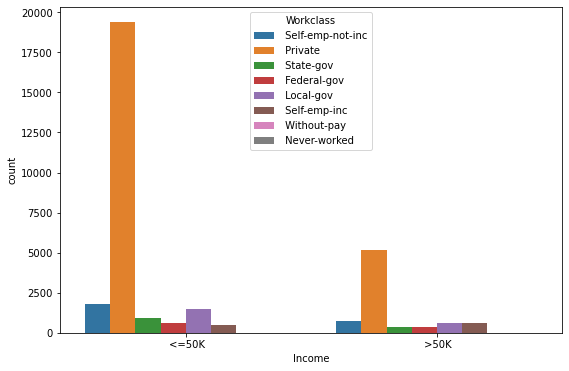

In [288]:
plt.figure(figsize=(9,6))
sns.countplot(x='Income', hue='Workclass', data=df)

In [289]:
# Details of Education Column
print(df["Education"].value_counts(),'\n')
edu = df['Education'].unique()
for i in edu:
    print(i,':\n',df.loc[df['Education'] == i].value_counts(df['Income']),'\n')
    print('--------------')

 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64 

 Bachelors :
 Income
 <=50K    3133
 >50K     2221
dtype: int64 

--------------
 HS-grad :
 Income
 <=50K    8826
 >50K     1675
dtype: int64 

--------------
 11th :
 Income
 <=50K    1115
 >50K       60
dtype: int64 

--------------
 Masters :
 Income
 >50K     959
 <=50K    764
dtype: int64 

--------------
 9th :
 Income
 <=50K    487
 >50K      27
dtype: int64 

--------------
 Some-college :
 Income
 <=50K    5904
 >50K     1387
dtype: int64 

--------------
 Assoc-acdm :
 Income
 <=50K    802
 >50K     265
dtype: int64 

--------------
 Assoc-voc :
 Income
 <=50K    1021
 >50K      361

<AxesSubplot:xlabel='Income', ylabel='count'>

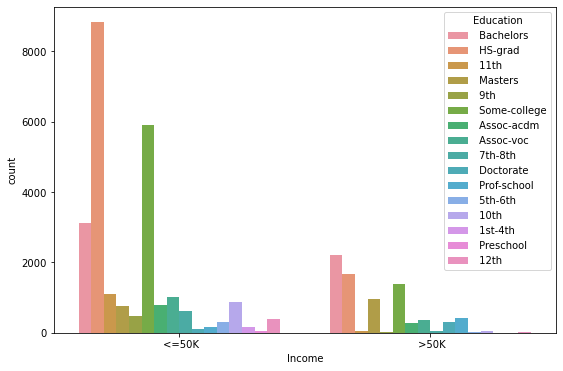

In [290]:
plt.figure(figsize=(9,6))
sns.countplot(x='Income', hue='Education', data=df)

In [291]:
# Details of Marital Status column
print(df["Marital_status"].value_counts(), '\n')
mar_st = df['Marital_status'].unique()
for i in mar_st:
    print(i,':\n',df.loc[df['Marital_status'] == i].value_counts(df['Income']),'\n')
    print('--------------')

 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64 

 Married-civ-spouse :
 Income
 <=50K    8284
 >50K     6692
dtype: int64 

--------------
 Divorced :
 Income
 <=50K    3980
 >50K      463
dtype: int64 

--------------
 Married-spouse-absent :
 Income
 <=50K    384
 >50K      34
dtype: int64 

--------------
 Never-married :
 Income
 <=50K    10191
 >50K       491
dtype: int64 

--------------
 Separated :
 Income
 <=50K    959
 >50K      66
dtype: int64 

--------------
 Married-AF-spouse :
 Income
 <=50K    13
 >50K     10
dtype: int64 

--------------
 Widowed :
 Income
 <=50K    908
 >50K      85
dtype: int64 

--------------


<AxesSubplot:xlabel='Income', ylabel='count'>

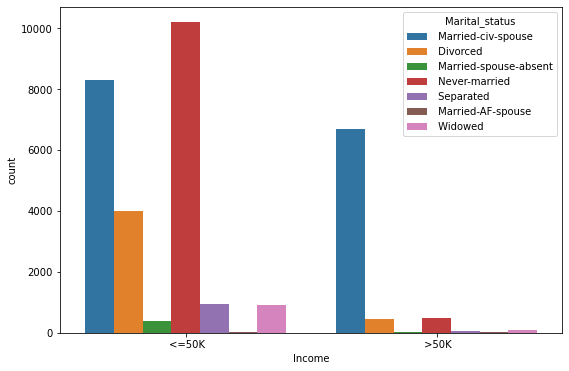

In [292]:
plt.figure(figsize=(9,6))
sns.countplot(x='Income', hue='Marital_status', data=df)

In [293]:
# Details of Occupation column
print(df["Occupation"].value_counts(), '\n')
mar_st = df['Occupation'].unique()
for i in mar_st:
    print(i,':\n',df.loc[df['Occupation'] == i].value_counts(df['Income']),'\n')
    print('--------------')

 Prof-specialty       5983
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3769
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: Occupation, dtype: int64 

 Exec-managerial :
 Income
 <=50K    2098
 >50K     1968
dtype: int64 

--------------
 Handlers-cleaners :
 Income
 <=50K    1284
 >50K       86
dtype: int64 

--------------
 Prof-specialty :
 Income
 <=50K    3933
 >50K     2050
dtype: int64 

--------------
 Other-service :
 Income
 <=50K    3158
 >50K      137
dtype: int64 

--------------
 Adm-clerical :
 Income
 <=50K    3262
 >50K      507
dtype: int64 

--------------
 Sales :
 Income
 <=50K    2667
 >50K      983
dtype: int64 

--------------
 Craft-repair :
 Income
 <=50K    3170
 >50K      929
dtype: int64 

------------

<AxesSubplot:xlabel='Income', ylabel='count'>

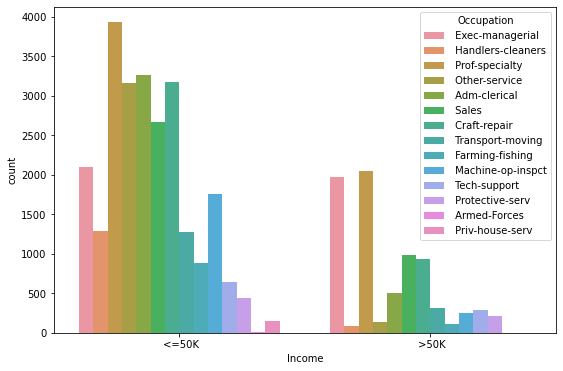

In [294]:
plt.figure(figsize=(9,6))
sns.countplot(x='Income', hue='Occupation', data=df)

In [295]:
# Details of Relationship column
print(df["Relationship"].value_counts(), '\n')
mar_st = df['Relationship'].unique()
for i in mar_st:
    print(i,':\n',df.loc[df['Relationship'] == i].value_counts(df['Income']),'\n')
    print('--------------')

 Husband           13193
 Not-in-family      8304
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: Relationship, dtype: int64 

 Husband :
 Income
 <=50K    7275
 >50K     5918
dtype: int64 

--------------
 Not-in-family :
 Income
 <=50K    7448
 >50K      856
dtype: int64 

--------------
 Wife :
 Income
 <=50K    823
 >50K     745
dtype: int64 

--------------
 Own-child :
 Income
 <=50K    5001
 >50K       67
dtype: int64 

--------------
 Unmarried :
 Income
 <=50K    3228
 >50K      218
dtype: int64 

--------------
 Other-relative :
 Income
 <=50K    944
 >50K      37
dtype: int64 

--------------


<AxesSubplot:xlabel='Income', ylabel='count'>

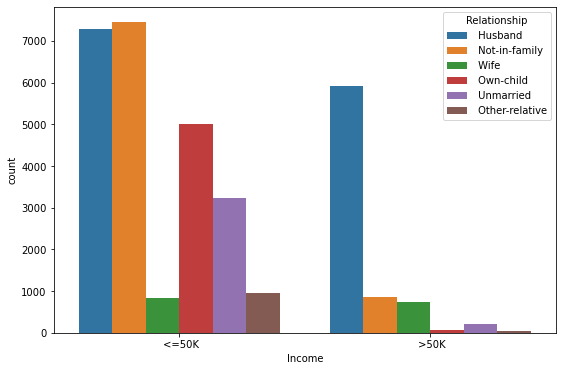

In [296]:
plt.figure(figsize=(9,6))
sns.countplot(x='Income', hue='Relationship', data=df)

In [297]:
# Details of Race column
print(df["Race"].value_counts(), '\n')
mar_st = df['Race'].unique()
for i in mar_st:
    print(i,':\n',df.loc[df['Race'] == i].value_counts(df['Income']),'\n')
    print('--------------')

 White                 27815
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: Race, dtype: int64 

 White :
 Income
 <=50K    20698
 >50K      7117
dtype: int64 

--------------
 Black :
 Income
 <=50K    2737
 >50K      387
dtype: int64 

--------------
 Asian-Pac-Islander :
 Income
 <=50K    763
 >50K     276
dtype: int64 

--------------
 Amer-Indian-Eskimo :
 Income
 <=50K    275
 >50K      36
dtype: int64 

--------------
 Other :
 Income
 <=50K    246
 >50K      25
dtype: int64 

--------------


<AxesSubplot:xlabel='Income', ylabel='count'>

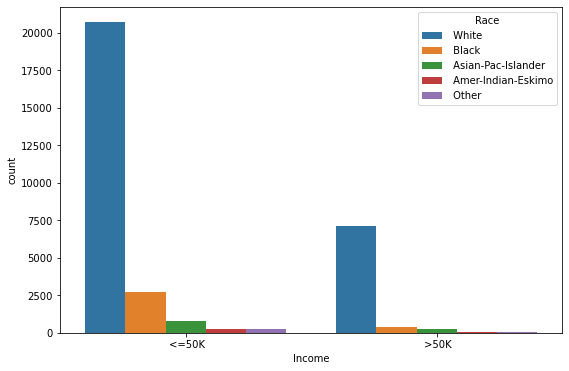

In [298]:
plt.figure(figsize=(9,6))
sns.countplot(x='Income', hue='Race', data=df)

In [299]:
# Details of Sex column
print(df["Sex"].value_counts(), '\n')
mar_st = df['Sex'].unique()
for i in mar_st:
    print(i,':\n',df.loc[df['Sex'] == i].value_counts(df['Income']),'\n')
    print('--------------')

 Male      21789
 Female    10771
Name: Sex, dtype: int64 

 Male :
 Income
 <=50K    15127
 >50K      6662
dtype: int64 

--------------
 Female :
 Income
 <=50K    9592
 >50K     1179
dtype: int64 

--------------


<AxesSubplot:xlabel='Income', ylabel='count'>

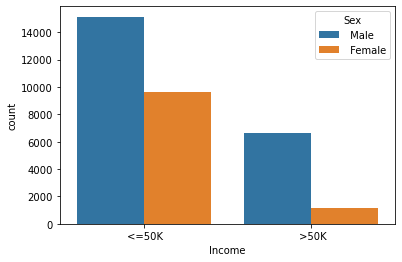

In [300]:
sns.countplot(x='Income', hue='Sex', data=df)

### Reducing Columns
An ordered factor with levels ' Preschool',' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th' , ' 10th', ' 11th', ' 12th', ' HS-grad', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', 'Some-college', ' Bachelors', ' Masters'' Doctorate'

In [417]:
df.Education=df.Education.replace([' Preschool',' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th' , ' 10th', ' 11th', ' 12th'], 'School', regex = True)
df.Education=df.Education.replace([' HS-grad', ' Prof-school', ' Assoc-acdm', ' Assoc-voc', 'Some-college',], 'Intermediate', regex = True)
df.Education=df.Education.replace([' Bachelors', ' Masters', ' Doctorate'], 'Advanced', regex = True)

Divided education levels in three parts based on ISCED(Intrenational Standard Clasification of Education)

In [418]:
df.Marital_status=df.Marital_status.replace([ ' Never-married'], 'No')
df.Marital_status=df.Marital_status.replace([' Married-civ-spouse' ' Married-AF-spouse'], 'Yes')
df.Marital_status=df.Marital_status.replace([ ' Divorced', ' Married-spouse-absent', ' Separated', ' Widowed'], 'Other')

Divided Marital status in 3 parts

In [419]:
df.Workclass=df.Workclass.replace([' Without-pay', ' Never-worked'], 0)
df.Workclass=df.Workclass.replace([' Self-emp-inc', ' Self-emp-not-inc', ' Private'], 1) 
df.Workclass=df.Workclass.replace([' State-gov', ' Federal-gov', ' Local-gov'],2)

In [420]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,1,83311,Advanced,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,1,215646,Intermediate,9,Other,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,1,234721,School,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,1,338409,Advanced,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,1,284582,Advanced,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,1,257302,Intermediate,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,1,154374,Intermediate,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,1,151910,Intermediate,9,Other,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,1,201490,Intermediate,9,No,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


Here we can see the changes in our dataset

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Workclass'}>,
        <AxesSubplot:title={'center':'Fnlwgt'}>],
       [<AxesSubplot:title={'center':'Education_num'}>,
        <AxesSubplot:title={'center':'Capital_gain'}>,
        <AxesSubplot:title={'center':'Capital_loss'}>],
       [<AxesSubplot:title={'center':'Hours_per_week'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

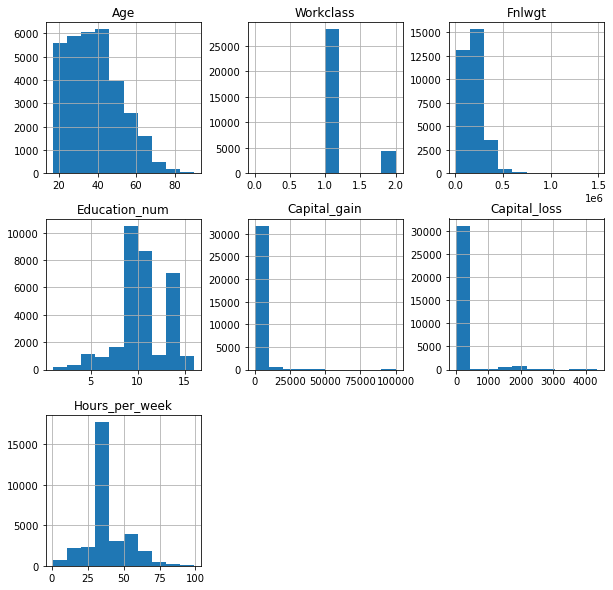

In [421]:
df.hist(figsize=(10,10), layout=(3,3), sharex=False)

In [459]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for i in ('Workclass','Education','Marital_status','Occupation','Relationship','Race','Sex','Income','Native_country'):
    df[i] = le.fit_transform(df[i])

In [460]:
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,257302,7,12,2,12,5,4,0,0,0,38,38,0
32556,40,3,154374,11,9,2,6,0,4,1,0,0,40,38,1
32557,58,3,151910,11,9,6,0,4,4,0,0,0,40,38,0
32558,22,3,201490,11,9,4,0,3,4,1,0,0,20,38,0


In [461]:
#NAtive country column have many values so I am dropping it
df.drop('Native_country', axis = 1, inplace = True)
df.drop('Fnlwgt', axis = 1, inplace = True)

In [462]:
df

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
0,50,5,9,13,2,3,0,4,1,0,0,13,0
1,38,3,11,9,0,5,1,4,1,0,0,40,0
2,53,3,1,7,2,5,0,2,1,0,0,40,0
3,28,3,9,13,2,9,5,2,0,0,0,40,0
4,37,3,12,14,2,3,5,4,0,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,3,7,12,2,12,5,4,0,0,0,38,0
32556,40,3,11,9,2,6,0,4,1,0,0,40,1
32557,58,3,11,9,6,0,4,4,0,0,0,40,0
32558,22,3,11,9,4,0,3,4,1,0,0,20,0


In [463]:
df.corr()

,Age,Workclass,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Income
Age,1.000000,0.040506,-0.010508,0.036527,-0.266292,0.001740,-0.263698,0.028718,0.088832,0.077674,0.057775,0.068756,0.234039
Workclass,0.040506,1.000000,0.004901,0.003445,-0.020545,0.007236,-0.057931,0.048323,0.071535,0.031496,0.002662,0.042206,0.002739
Education,-0.010508,0.004901,1.000000,0.359172,-0.038398,-0.041297,-0.010879,0.014135,-0.027349,0.030047,0.016744,0.055510,0.079311
Education_num,0.036527,0.003445,0.359172,1.000000,-0.069338,0.071012,-0.094145,0.031825,0.012256,0.122627,0.079932,0.148127,0.335182
Marital_status,-0.266292,-0.020545,-0.038398,-0.069338,1.000000,0.035008,0.185461,-0.068025,-0.129337,-0.043398,-0.034182,-0.190521,-0.199295
Occupation,0.001740,0.007236,-0.041297,0.071012,0.035008,1.000000,-0.037465,-0.004821,0.047497,0.018028,0.009670,-0.012881,0.034599
Relationship,-0.263698,-0.057931,-0.010879,-0.094145,0.185461,-0.037465,1.000000,-0.116052,-0.582453,-0.057918,-0.061064,-0.248975,-0.250924
Race,0.028718,0.048323,0.014135,0.031825,-0.068025,-0.004821,-0.116052,1.000000,0.087197,0.011143,0.018902,0.041910,0.071853
Sex,0.088832,0.071535,-0.027349,0.012256,-0.129337,0.047497,-0.582453,0.087197,1.000000,0.048477,0.045572,0.229312,0.215995
Capital_gain,0.077674,0.031496,0.030047,0.122627,-0.043398,0.018028,-0.057918,0.011143,0.048477,1.000000,-0.031614,0.078409,0.223333


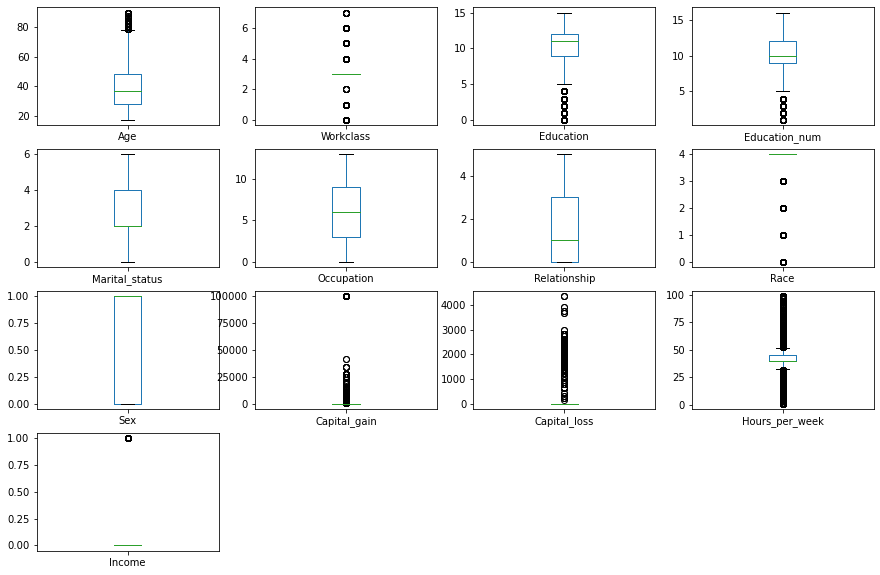

In [464]:
#checking outliers
df.plot(kind='box', subplots = True, layout=(4,4), figsize=(15,10));

Data loss percentage is more than 14 percent which is not good. so, I am not removing outliers because it will  make bias prediction

### Model Building

In [470]:
x=df.drop(['Income'], axis=1)
y=df['Income']

In [472]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [475]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

lr=LogisticRegression()

model = lr.fit(x_train,y_train)
pred = model.predict(x_test)
print('Accuracy on training data: {:,.3f}'.format(lr.score(x_train, y_train)))
print('Accuracy on test data: {:,.3f}'.format(lr.score(x_test, y_test)))

Accuracy on training data: 0.804
Accuracy on test data: 0.801


In [481]:
#Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

rf_model = rf.fit(x_train,y_train)
rf_pred = rf_model.predict(x_test)

print('Accuracy on training data: {:,.3f}'.format(rf.score(x_train, y_train)))
print('Accuracy on test data: {:,.3f}'.format(rf.score(x_test, y_test)))

Accuracy on training data: 0.977
Accuracy on test data: 0.851


In [482]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


In [483]:
print(confusion_matrix(y_test, rf_pred))

[[4577  380]
 [ 588  967]]


    TP   FN
    FP   TN

In [484]:
print(classification_report(y_test, rf_pred))

              precision    recall  f1-score   support

           0       0.89      0.92      0.90      4957
           1       0.72      0.62      0.67      1555

    accuracy                           0.85      6512
   macro avg       0.80      0.77      0.79      6512
weighted avg       0.85      0.85      0.85      6512



In [485]:
#precision: tp/tp+fp
print('Precision - ', 4577/(4577+588))

Precision -  0.8861568247821878


In [486]:
#recall = tp/tp+fn
print("Recall - ", 4577/(4577+380))

Recall -  0.9233407302804115


In [487]:
'print(Precision - ', 967/(967+380)

('print(Precision - ', 0.7178916109873794)

In [488]:
print("Recall - ", 967/(967+588))

Recall -  0.6218649517684888


In [489]:
#Confusion Matrix for Decision Tree Classifier:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
preddt = dt.predict(x_test)
print('Accuracy Score:', accuracy_score(y_test,preddt))
print('Confusion Matrix:', confusion_matrix(y_test,preddt))
print('Classification Report:', classification_report(y_test,preddt))

Accuracy Score: 0.8201781326781327
Confusion Matrix: [[4405  552]
 [ 619  936]]
Classification Report:               precision    recall  f1-score   support

           0       0.88      0.89      0.88      4957
           1       0.63      0.60      0.62      1555

    accuracy                           0.82      6512
   macro avg       0.75      0.75      0.75      6512
weighted avg       0.82      0.82      0.82      6512



In [490]:
# Cross Validation
pred_train = lr.predict(x_train)
pred_test =lr.predict(x_test)
Train_accuracy = accuracy_score(y_train,pred_train)
Test_accuracy = accuracy_score(y_test,pred_test)
max_accu=0
max_rs=0

In [492]:
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean = cv_score.mean()
    if cv_mean > max_accu:
        max_accu = cv_mean
        max_rs = j
    print(f'At cross fold {j} cv score is {cv_mean} and accuracy score training is {Train_accuracy} and accuracy for the testing is {Test_accuracy}')
    print('\n')

At cross fold 2 cv score is 0.8036240786240786 and accuracy score training is 0.8040540540540541 and accuracy for the testing is 0.8008292383292384


At cross fold 3 cv score is 0.8037470076080733 and accuracy score training is 0.8040540540540541 and accuracy for the testing is 0.8008292383292384


At cross fold 4 cv score is 0.8045761670761671 and accuracy score training is 0.8040540540540541 and accuracy for the testing is 0.8008292383292384


At cross fold 5 cv score is 0.8047297297297297 and accuracy score training is 0.8040540540540541 and accuracy for the testing is 0.8008292383292384


At cross fold 6 cv score is 0.8039927822175205 and accuracy score training is 0.8040540540540541 and accuracy for the testing is 0.8008292383292384


At cross fold 7 cv score is 0.8037776579212578 and accuracy score training is 0.8040540540540541 and accuracy for the testing is 0.8008292383292384


At cross fold 8 cv score is 0.8032555282555283 and accuracy score training is 0.8040540540540541 and

In [493]:
#Cross Validation for Logistic Regrssion:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(lr,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Logistic Regression',cv_mean)

Cross validation score for Logistic Regression 0.8030716061337536


In [494]:
#Cross Validation for Decision Tree Classifier:
from sklearn.model_selection import cross_val_score
cv_score=cross_val_score(dt,x,y,cv=j)
cv_mean = cv_score.mean()
print('Cross validation score for Decision Tree',cv_mean)

Cross validation score for Decision Tree 0.8183665598391343


In [495]:
# Regularization
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
parameters = {'alpha':[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10))}
EN=ElasticNet()
clf=GridSearchCV(EN,parameters)
clf.fit(x_train,y_train)

GridSearchCV(estimator=ElasticNet(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10],
                         'random_state': [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]})

In [496]:
print(clf.best_params_)

{'alpha': 0.0001, 'random_state': 0}


In [497]:
EN = ElasticNet(alpha=0.01,random_state=0)
EN.fit(x_train,y_train)
EN.score(x_train,y_train)
pred_EN=EN.predict(x_test)
lss= accuracy_score(y_test,pred_test)
lss

0.8008292383292384

In [498]:
#cross_validation_mean = cv_mean
#cross_validation_score= cv_score
cross_validation_score = cross_val_score(EN,x,y,cv=5)
cross_validation_mean = cross_validation_score.mean()
cross_validation_mean

0.2602269987902154

In [499]:
# Ensemble technique
from sklearn.model_selection import GridSearchCV
parameters = {'max_depth':np.arange(2,15),'criterion':['gini','entrophy']}
rf = DecisionTreeClassifier()
clf=GridSearchCV(rf,parameters,cv=5)
clf.fit(x_train,y_train)
print(clf.best_params_)

{'criterion': 'gini', 'max_depth': 7}


In [502]:
rf=DecisionTreeClassifier(criterion='gini',max_depth=2)
rf.fit(x_train,y_train)
rf.score(x_train,y_train)
pred_decision=rf.predict(x_test)
rfs = accuracy_score(y_test,pred_decision)
print('Accuracy Score: ',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('Cross Validation Score:',rfc*100)

Accuracy Score:  82.96990171990171
Cross Validation Score: 82.62285012285012


We are getting model accuracy and cross validation 82% which is good. 

In [503]:
import pickle
filename = 'Census_income.pkl'
pickle.dump(rf,open(filename,'wb'))

In [504]:
#Loading Model:
loaded_model=pickle.load(open('Census_income.pkl','rb'))
result=loaded_model.score(x_test,y_test)
print(result)

0.8296990171990172


In [505]:
#conclusion
conclusion=pd.DataFrame([loaded_model.predict(x_test)[:],pred_decision[:]],index=["Predicted","Orginal"])

In [506]:
conclusion

,0,1,2,3,4,5,6,7,8,9,...,6502,6503,6504,6505,6506,6507,6508,6509,6510,6511
Predicted,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
Orginal,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
